In [1]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/ankitsingh/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
speeches = [
    inaugural.raw('1941-Roosevelt.txt'),
    inaugural.raw('1961-Kennedy.txt'),
    inaugural.raw('1973-Nixon.txt')
]

In [4]:
def get_stats(text):
    num_characters = len(text)
    words = word_tokenize(text)
    num_words = len(words)
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    return num_characters, num_words, num_sentences

In [5]:
for i, speech in enumerate(speeches):
    num_characters, num_words, num_sentences = get_stats(speech)
    print(f"\nSpeech {i+1} Stats:")
    print("Number of Characters:", num_characters)
    print("Number of Words:", num_words)
    print("Number of Sentences:", num_sentences)



Speech 1 Stats:
Number of Characters: 7571
Number of Words: 1526
Number of Sentences: 68

Speech 2 Stats:
Number of Characters: 7618
Number of Words: 1543
Number of Sentences: 52

Speech 3 Stats:
Number of Characters: 9991
Number of Words: 2006
Number of Sentences: 68


In [6]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [9]:
def clean_text(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return words

In [10]:
cleaned_words = []
for speech in speeches:
    cleaned_words.extend(clean_text(speech))

In [11]:
common_words = Counter(cleaned_words).most_common(3)
print("\n3 Most Common Words:", common_words)


3 Most Common Words: [('us', 46), ('nation', 40), ('let', 39)]


In [13]:
pip install some_package

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
all_speeches = ' '.join(speeches)

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_speeches)

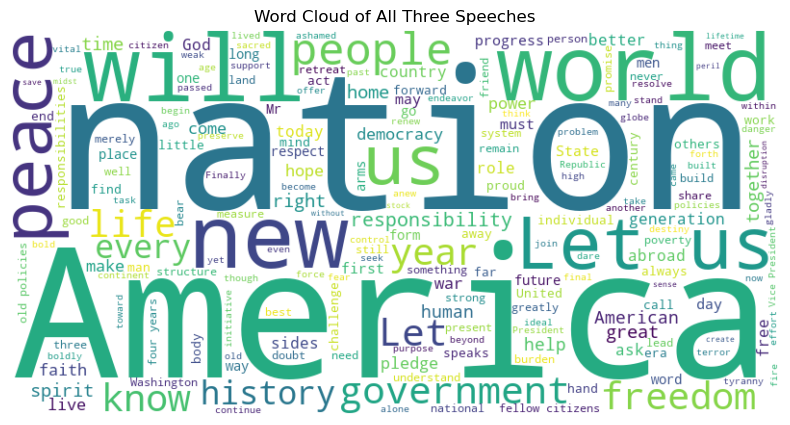

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Three Speeches')
plt.show()